In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# File paths
grid_fp = r"data/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = r"data/roads.shp"
metro_fp = r"data/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [3]:
# Grid CRS
gridCRS = grid.crs
print(gridCRS)
grid.head(2)

{'init': 'epsg:3067'}


,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038053,..."


In [4]:
# Roads and metro CRSs
print(roads.crs)
print(metro.crs)
roads.head(2)

{'proj': 'tmerc', 'lat_0': 0, 'lon_0': 24, 'k': 1, 'x_0': 2500000, 'y_0': 0, 'ellps': 'intl', 'units': 'm', 'no_defs': True}
{'proj': 'tmerc', 'lat_0': 0, 'lon_0': 24, 'k': 1, 'x_0': 2500000, 'y_0': 0, 'ellps': 'intl', 'units': 'm', 'no_defs': True}


,NIMI,NIMI0,NRO,MTRYHM,geometry
0,Moottoriväylä,Porvoon väylä,1,80,LINESTRING (2559971.273352734 6682910.73006964...
1,Moottoriväylä,Kehä III,1,80,LINESTRING (2564301.75712334 6681430.171351024...


In [5]:
# Reproject geometries onto grid CRS
roads = roads.copy().to_crs(crs=gridCRS)
metro = metro.copy().to_crs(crs=gridCRS)

print(roads['geometry'].crs)
print(metro.crs)
roads.head(2)

{'init': 'epsg:3067'}
{'init': 'epsg:3067'}


,NIMI,NIMI0,NRO,MTRYHM,geometry
0,Moottoriväylä,Porvoon väylä,1,80,LINESTRING (393902.4363970492 6681130.13311762...
1,Moottoriväylä,Kehä III,1,80,LINESTRING (398159.608959613 6679454.908297231...


C:\ProgramData\Anaconda3\envs\geopy\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
C:\ProgramData\Anaconda3\envs\geopy\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


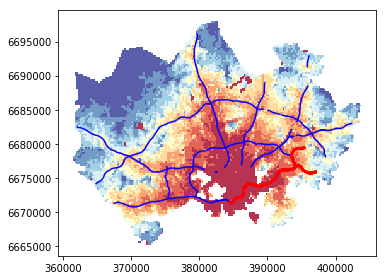

In [6]:
# Visualize the travel times into 9 classes using "Quantiles" 
# classification scheme
# Add also a little bit of transparency with `alpha` parameter
# (ranges from 0 to 1 where 0 is fully transparent and 1 has no transparency)
map1 = grid.plot(column='car_r_t', lw=0.03, cmap='RdYlBu', scheme='quantiles', k=9, alpha=0.8)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=map1, color="blue", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=map1, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = r"output/static_map.png"
plt.savefig(outfp, dpi=300)